# **except, except:-except; except:-else:, except (e1,e2)**
the hierarchy of exceptions

raise, raise ex, assert

event classes, except E as e, arg property

self-defined exceptions, defining and using

**OVERALL SYNCTAX**

try:

*>>> #The part of the code which can raise an exception.*

except:

*>>> #The part of the code designed to handle a possible exception.*

else:

*>>> #The part of the code executed when no exception is raised.*

finally:

*>>> #The part of the code that is *always* executed.*

**The else: and finally: branches are not obligatory and can be omitted**

In [ ]:
first_number = int(input("Enter the first number: "))
second_number = int(input("Enter the second number: "))

try:
    print(first_number / second_number)
except:
    print("This operation cannot be done.")

print("THE END.")

Enter the first number: 1
Enter the second number: 0
This operation cannot be done.
THE END.


In [ ]:
# Note: the print("2") instruction was lost in the process.

try:
    print("1")
    x = 1 / 0
    print("2")
except:
    print("Oh dear, something went wrong...")

print("3")

1
Oh dear, something went wrong...
3


try:
    :

except exc1:
    :

except exc2:
    :

except:
    :

This is how it works:

if the try branch raises the exc1 exception, it will be handled by the except exc1: block;

similarly, if the try branch raises the exc2 exception, it will be handled by the except exc2: block;

if the try branch raises any other exception, it will be handled by the unnamed except block.

In [ ]:
try:
    x = int(input("Enter a number: "))
    y = 1 / x
    print(y)
except ZeroDivisionError:
    print("You cannot divide by zero, sorry.")
except ValueError:
    print("You must enter an integer value.")
except:
    print("Oh dear, something went wrong...")

print("THE END.")

Enter a number: 5
0.2
THE END.


In [18]:
try:
    x = int(input("Enter a number: "))
    y = 1 / x
    print(x)
except ZeroDivisionError:
    print("You cannot divide by zero, sorry.")
except ValueError:
    print("You must enter an integer value.")
except:
    print("Oh dear, something went wrong...")
else:
    print("Else")
finally:
    print("finally")

5
Else
finally


In [20]:
try:
    x = int(input("Enter a number: "))
    print(x)
    y = 1 / x
except ZeroDivisionError:
    print("You cannot divide by zero, sorry.")
except ValueError:
    print("You must enter an integer value.")
except:
    print("Oh dear, something went wrong...")
else:
    print("Else")
finally:
    print("finally")

0
You cannot divide by zero, sorry.
finally


In [23]:
# REMOVE except ZeroDivisionError:

try:
    x = int(input("Enter a number: "))
    print(x)
    y = 1 / x
except ValueError:
    print("You must enter an integer value.")
except:
    print("Oh dear, something went wrong...")
else:
    print("Else")
finally:
    print("finally")


You must enter an integer value.
finally


the except branches are searched in the same order in which they appear in the code;

you must not use more than one except branch with a certain exception name;

the number of different except branches is arbitrary - the only condition is that if you use try, you must put at least one except (named or not) after it;

the except keyword must not be used without a preceding try;

if any of the except branches is executed, no other branches will be visited;

if none of the specified except branches matches the raised exception, the exception remains unhandled (we'll discuss it soon)

if an unnamed except branch exists (one without an exception name), it has to be specified as the last.

The else: branch (if it exists) must be specified after all the except branches.

The finally branch (if it exists) must be specified as the last of all branches.

In [ ]:
# if none of the specified except branches matches the raised exception, the exception remains unhandled (we'll discuss it soon)

try:
    x = int(input("Enter a number: "))
    y = 1 / x
    print(y)
except ValueError:
    print("You must enter an integer value.")

print("THE END.")

Enter a number: 0


ZeroDivisionError: ignored

# **the hierarchy of exceptions**

raise, raise ex, assert

event classes, except E as e, arg property

self-defined exceptions, defining and using

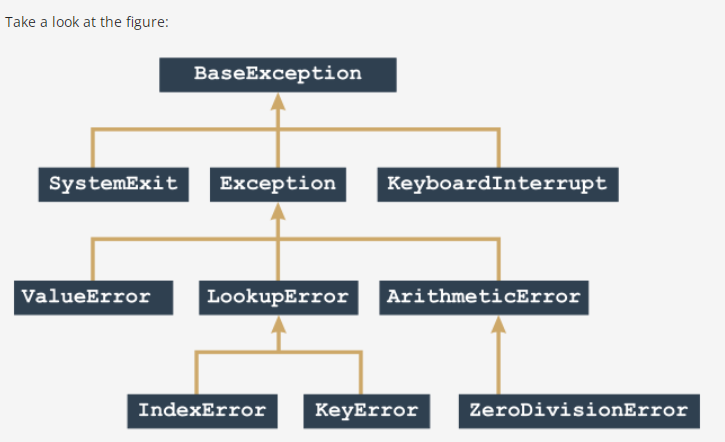

In [ ]:
try:
    y = 1 / 0
except ArithmeticError:
    print("Oooppsss...")

print("THE END.")

Oooppsss...
THE END.


In [ ]:
try:
    y = 1 / 0
except Exception:
    print("Oooppsss...")

print("THE END.")

Oooppsss...
THE END.


In [ ]:
try:
    y = 1 / 0
except BaseException:
    print("Oooppsss...")

print("THE END.")

Oooppsss...
THE END.


Remember:

the order of the branches matters!

don't put more general exceptions before more concrete ones;

this will make the latter one unreachable and useless;

moreover, it will make your code messy and inconsistent;

Python won't generate any error messages regarding this issue.

In [ ]:
try:
    y = 1 / 0
except ArithmeticError:
    print("Arithmetic problem!")
except ZeroDivisionError:
    print("Zero Division!")

print("THE END.")

Arithmetic problem!
THE END.


In [ ]:
try:
    y = 1 / 0
except ZeroDivisionError:
    print("Zero Division!")
except ArithmeticError:
    print("Arithmetic problem!")

print("THE END.")

Zero Division!
THE END.


**If an exception is raised inside a function, it can be handled:**

inside the function;

outside the function;



In [ ]:
def bad_fun(n):
    try:
        return 1 / n
    except ArithmeticError:
        print("Arithmetic Problem!")
    return None

bad_fun(0)

print("THE END.")

Arithmetic Problem!
THE END.


In [ ]:
def bad_fun(n):
    return 1 / n

try:
    bad_fun(0)
except ArithmeticError:
    print("Arithmetic Problem!")

print("THE END.")

Arithmetic Problem!
THE END.


# **raise, raise ex, assert**

event classes, except E as e, arg property

self-defined exceptions, defining and using

**The raise instruction raises the specified exception named exc as if it was raised in a normal (natural) way:**

In [ ]:
def bad_fun(n):
    raise ZeroDivisionError

try:
    bad_fun(5)
except ArithmeticError:
    print("What happened? An error?")

print("THE END.")

What happened? An error?
THE END.


There is one serious restriction: this kind of **raise** instruction may be used **inside the except branch only**; using it in any other context causes an error.

In [ ]:
def bad_fun(n):
    try:
        return n / 0
    except:
        print("I did it again!")
        # raise


try:
    bad_fun(0)
except ArithmeticError:
    print("I see!")

print("THE END.")

I did it again!
THE END.


In [ ]:
def bad_fun(n):
    try:
        return n / 0
    except:
        print("I did it again!")
        raise
try:
    bad_fun(0)
except ArithmeticError:
    print("I see!")

print("THE END.")

I did it again!
I see!
THE END.


In [ ]:
def bad_fun(n):
    try:
        return n / 0
    except:
      raise
      print("I did it again!")

try:
    bad_fun(0)
except ArithmeticError:
    print("I see!")

print("THE END.")

I see!
THE END.


**Assert: How does it work?**

It evaluates the expression;
if the expression evaluates to True, or a non-zero numerical value, or a non-empty string, or any other value different than None, it won't do anything else;

otherwise, it automatically and immediately raises an exception named AssertionError (in this case, we say that the assertion has failed)

In [ ]:
import math

x = float(input("Enter a number: "))
assert x >= 0.0

x = math.sqrt(x)

print(x)

Enter a number: 1
1.0


In [ ]:
import math

x = float(input("Enter a number: "))
assert x >= 0.0

x = math.sqrt(x)

print(x)

Enter a number: -1


AssertionError: ignored

**Location: BaseException ← Exception ← AssertionError**

Description: an abstract exception including all exceptions caused by arithmetic operations like zero division or an argument's invalid domain

**Location: BaseException ← Exception ← LookupError ← IndexError**

Description: a concrete exception raised when you try to access a non-existent sequence's element (e.g., a list's element)

**Location: BaseException ← KeyboardInterrupt**

Description: a concrete exception raised when the user uses a keyboard shortcut designed to terminate a program's execution (Ctrl-C in most OSs); if handling this exception doesn't lead to program termination, the program continues its execution.

**Location: BaseException ← Exception ← LookupError**

Description: an abstract exception including all exceptions caused by errors resulting from invalid references to different collections (lists, dictionaries, tuples, etc.)

**Location: BaseException ← Exception ← MemoryError**

Description: a concrete exception raised when an operation cannot be completed due to a lack of free memory.

**Location: BaseException ← Exception ← ArithmeticError ← OverflowError**

Description: a concrete exception raised when an operation produces a number too big to be successfully stored

**Location: BaseException ← Exception ← StandardError ← ImportError**

Description: a concrete exception raised when an import operation fails

**Location: BaseException ← Exception ← LookupError ← KeyError**

Description: a concrete exception raised when you try to access a collection's non-existent element (e.g., a dictionary's element)

In [24]:
#If you want to handle more than one exception in the same except branch

#except (Exception_1, Exception_2):

# **event classes, except E as e, arg property**

self-defined exceptions, defining and using

Note: the else: branch has to be located after the last except branch.

Note: if the except has sucessfully executed, then the else will **NOT** be executed

In [1]:
def reciprocal(n):
    try:
        n = 1 / n
        print("Try block")
    except ZeroDivisionError:
        print("Division failed")
        return None
    else:
        print("Everything went fine")
        return n


print(reciprocal(2))
print(reciprocal(0))

Try block
Everything went fine
0.5
Division failed
None


In [3]:
# The finally block is always executed (it finalizes the try-except block execution, hence its name), no matter what happened earlier, 
# even when raising an exception, no matter whether this has been handled or not.

def reciprocal(n):
    try:
        n = 1 / n
        print("Try block")
    except ZeroDivisionError:
        print("Division failed")
    else:
        print("Everything went fine")
    finally:
        print("It's time to say goodbye")
        return n


print(reciprocal(2))
print("\n")
print(reciprocal(0))

Try block
Everything went fine
It's time to say goodbye
0.5


Division failed
It's time to say goodbye
0


In [3]:
# __str__() method) and it contains a brief message describing the reason.

try:
    i = int("Hello!")
except Exception as e:
    print(e)
    print(e.__str__())
    print(e.args)

invalid literal for int() with base 10: 'Hello!'
invalid literal for int() with base 10: 'Hello!'
("invalid literal for int() with base 10: 'Hello!'",)


In [ ]:
BaseException.__name__

'BaseException'

In [ ]:
BaseException.__subclasses__()

[Exception, GeneratorExit, SystemExit, KeyboardInterrupt]

The BaseException class introduces a property named args. It's a tuple designed to gather all arguments passed to the class constructor. It is empty if the construct has been invoked without any arguments, or contains just one element when the constructor gets one argument (we don't count the self argument here), and so on.

In [1]:
LookupError.__subclasses__()

[IndexError, KeyError, encodings.CodecRegistryError]

In [11]:
ArithmeticError.__subclasses__()

[FloatingPointError,
 OverflowError,
 ZeroDivisionError,
 decimal.DecimalException]

In [ ]:
try:
    raise Exception
except Exception as e:
    print(e, e.__str__(), sep=' : ' ,end=' : ')
    print(e.args)

 :  : ()


In [8]:
try:
    raise Exception("my exception")
except Exception as e:
    print(e, e.__str__(), sep=' - ', end=' : ')
    print('')
    print(e.args)

my exception - my exception : 
('my exception',)


In [9]:
try:
    raise Exception("my", "exception")
except Exception as e:
    print(e, e.__str__(), sep=' - ', end=' : ')
    print(e.args)

('my', 'exception') - ('my', 'exception') : ('my', 'exception')


# **self-defined exceptions, defining and using**

In [1]:
class MyZeroDivisionError(ZeroDivisionError):	
    pass

In [2]:
def do_the_division(mine):
    if mine:
        raise MyZeroDivisionError("some worse news")
    else:		
        raise ZeroDivisionError("some bad news")

In [3]:
for mode in [False, True]:
    try:
        do_the_division(mode)
    except MyZeroDivisionError:
        print('My division by zero')
    except ZeroDivisionError:
        print('Original division by zero')

Original division by zero
My division by zero


In [10]:
class PizzaError(Exception):
    def __init__(self, pizza='uknown', message=''):
        Exception.__init__(self, message)
        self.pizza = pizza


class TooMuchCheeseError(PizzaError):
    def __init__(self, pizza='uknown', cheese='>100', message=''):
        PizzaError.__init__(self, pizza, message)
        self.cheese = cheese


def make_pizza(pizza, cheese):
    if pizza not in ['margherita', 'capricciosa', 'calzone']:
        raise PizzaError(pizza=pizza, message="Pizza should be in list")
    if cheese > 100:
        raise TooMuchCheeseError(pizza, cheese, "Too mouch cheese")
    print("Pizza ready!")


for (pz, ch) in [('calzone', 0), ('margherita', 110), ('mafia', 20)]:
    try:
        make_pizza(pz, ch)
    except TooMuchCheeseError as tmce:
        print(tmce, ':', tmce.cheese, ':.args', tmce.args)
    except PizzaError as pe:
        print(pe, ':__str__() =>', pe.__str__(), ':.args', pe.args, ':', pe.pizza)

Pizza ready!
Too mouch cheese : 110 :.args ('Too mouch cheese',)
Pizza should be in list :__str__() => Pizza should be in list :.args ('Pizza should be in list',) : mafia


In [17]:
import math

class NewValueError(ValueError):
    def __init__(self, name, color, state):
        self.data = (name, color, state)

try:
    raise NewValueError("Enemy warning", "Red alert", "High readiness")
except NewValueError as nve:
    for arg in nve.args:
        print(arg, end='! ')

Enemy warning! Red alert! High readiness! 